In [2]:
import torch
from torch.cuda.amp import autocast,GradScaler
import torchaudio
import models
from torch import nn
import matplotlib.pyplot as plt

/kuacc/users/bbiner21/.local/lib/python3.8/site-packages/torch/cuda/amp/autocast_mode.py:118: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


In [3]:
audio_model = models.ASTModel(label_dim=21, fstride=10, tstride=10, input_fdim=128,
                                  input_tdim=512, imagenet_pretrain=True,
                                  audioset_pretrain=True, model_size='base384')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

path = '../egs/custom/exp/test-custom-f10-t10-impTrue-aspTrue-b48-lr1e-5-16-bc_22_data-ignored_sec_labels-run2/models/audio_model.6.pth'



sd = torch.load(path, map_location=device)

if not isinstance(audio_model, nn.DataParallel):
    audio_model = nn.DataParallel(audio_model)
audio_model = audio_model.to(device)
audio_model.load_state_dict(sd,strict=False)

---------------AST Model Summary---------------
ImageNet pretraining: True, AudioSet pretraining: True
frequncey stride=10, time stride=10
number of patches=600


<All keys matched successfully>

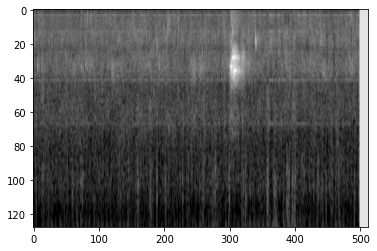

In [10]:
filename = '/kuacc/users/bbiner21/sound-separation/models/bird_mixit/output_8/best_example_37_42_8ch.wav'

waveform, sr = torchaudio.load(filename)
waveform = waveform - waveform.mean()




fbank = torchaudio.compliance.kaldi.fbank(waveform, htk_compat=True, sample_frequency=sr, use_energy=False, window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)

n_frames = fbank.shape[0]

end = 512
if end > n_frames:
    m = torch.nn.ZeroPad2d((0, 0, 0, int(end-n_frames)))            
    fbank = m(fbank)
fbank = torch.flip(fbank.t(), [0])
plt.figure()
#plt.plot(fbank.t().numpy())
plt.imshow(fbank.numpy(), cmap='gray',aspect='auto')

In [5]:
fbank = fbank.unsqueeze(0)
out = audio_model(fbank)
out = torch.sigmoid(out)


In [6]:
out

tensor([[0.2104, 0.2701, 0.2363, 0.2765, 0.1457, 0.2546, 0.1279, 0.4303, 0.1398,
         0.1616, 0.3784, 0.0798, 0.0896, 0.4605, 0.1029, 0.2351, 0.1942, 0.1877,
         0.1282, 0.1934, 0.1061]], grad_fn=<SigmoidBackward>)

499


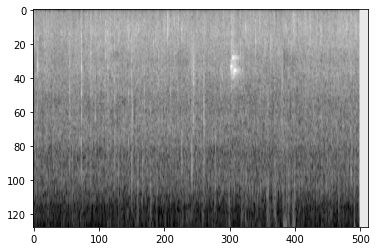

In [7]:
filename = '/kuacc/users/bbiner21/sound-separation/models/bird_mixit/output_folder/output_source0.wav'

waveform, sr = torchaudio.load(filename)
waveform = waveform - waveform.mean()




fbank2 = torchaudio.compliance.kaldi.fbank(waveform, htk_compat=True, sample_frequency=sr, use_energy=False, window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)

n_frames = fbank2.shape[0]
print(n_frames)
end = 512
if end > n_frames:
    m = torch.nn.ZeroPad2d((0, 0, 0, int(end-n_frames)))            
    fbank2 = m(fbank2)

fbank2 = fbank2[:,0:512]

fbank2 = torch.flip(fbank2.t(), [0])
plt.figure()
# #plt.plot(fbank.t().numpy())
plt.imshow(fbank2.numpy(), cmap='gray',aspect='auto')

In [8]:
fbank2 = fbank2.unsqueeze(0)
out2 = audio_model(fbank2)
out2 = torch.sigmoid(out2)

In [9]:
out2

tensor([[0.0341, 0.1591, 0.0593, 0.1135, 0.0337, 0.0927, 0.0417, 0.2032, 0.0321,
         0.0666, 0.1024, 0.0246, 0.0363, 0.3247, 0.0321, 0.0737, 0.0793, 0.0453,
         0.0462, 0.0896, 0.0413]], grad_fn=<SigmoidBackward>)

499


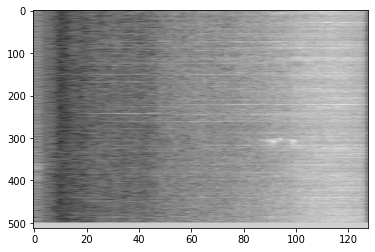

In [21]:
filename = '/kuacc/users/bbiner21/sound-separation/models/bird_mixit/temp2.wav'

waveform, sr = torchaudio.load(filename)
waveform = waveform - waveform.mean()




fbank2 = torchaudio.compliance.kaldi.fbank(waveform, htk_compat=True, sample_frequency=sr, use_energy=False, window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)

n_frames = fbank2.shape[0]
print(n_frames)
end = 512
if end > n_frames:
    m = torch.nn.ZeroPad2d((0, 0, 0, int(end-n_frames)))            
    fbank2 = m(fbank2)

fbank2 = fbank2[:,0:512]

#fbank2 = torch.flip(fbank2.t(), [0])
plt.figure()
# #plt.plot(fbank.t().numpy())
plt.imshow(fbank2.numpy(), cmap='gray',aspect='auto')

In [22]:
#fbank2 = torch.flip(fbank2.t(), [0])

In [23]:
fbank2 = fbank2.unsqueeze(0)
out3 = audio_model(fbank2)
out3 = torch.sigmoid(out3)

In [13]:
out3

tensor([[0.0073, 0.0415, 0.0165, 0.0172, 0.0130, 0.0202, 0.0121, 0.0504, 0.0074,
         0.0266, 0.0144, 0.0076, 0.0136, 0.1086, 0.0130, 0.0178, 0.0391, 0.0068,
         0.0096, 0.0333, 0.0094]], grad_fn=<SigmoidBackward>)

In [19]:
out3

tensor([[0.0056, 0.0361, 0.0197, 0.0154, 0.0133, 0.0192, 0.0086, 0.0325, 0.0057,
         0.0139, 0.0131, 0.0064, 0.0089, 0.1025, 0.0084, 0.0284, 0.0274, 0.0059,
         0.0097, 0.0225, 0.0069]], grad_fn=<SigmoidBackward>)

In [24]:
out3

tensor([[0.0073, 0.0415, 0.0165, 0.0172, 0.0130, 0.0202, 0.0121, 0.0504, 0.0074,
         0.0266, 0.0144, 0.0076, 0.0136, 0.1086, 0.0130, 0.0178, 0.0391, 0.0068,
         0.0096, 0.0333, 0.0094]], grad_fn=<SigmoidBackward>)

499


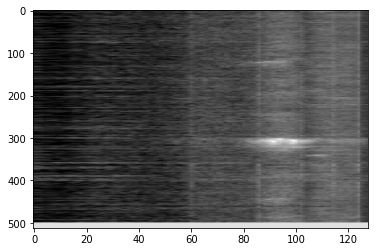

In [30]:
filename = '/kuacc/users/bbiner21/sound-separation/models/bird_mixit/output_8_2/output_source3.wav'

waveform, sr = torchaudio.load(filename)
waveform = waveform - waveform.mean()


fbank = torchaudio.compliance.kaldi.fbank(waveform, htk_compat=True, sample_frequency=sr, use_energy=False, window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)


n_frames = fbank.shape[0]
print(n_frames)
end = 512
if end > n_frames:
    m = torch.nn.ZeroPad2d((0, 0, 0, int(end-n_frames)))            
    fbank = m(fbank)

fbank = fbank[:,0:512]

# fbank = torch.rot90(fbank, 3, [0, 1])
#fbank = torch.flip(fbank.t(), [0])
plt.figure()
#plt.plot(fbank.t().numpy())
plt.imshow(fbank.numpy(), cmap='gray',aspect='auto')

In [31]:
fbank = fbank.unsqueeze(0)
out4 = audio_model(fbank)
out4 = torch.sigmoid(out4)

In [29]:
out4

tensor([[0.1884, 0.2841, 0.2016, 0.3165, 0.1239, 0.2767, 0.1202, 0.4663, 0.1617,
         0.2003, 0.4145, 0.0921, 0.1040, 0.5095, 0.1028, 0.2359, 0.2276, 0.1698,
         0.1711, 0.1834, 0.1298]], grad_fn=<SigmoidBackward>)

In [32]:
out4

tensor([[0.2169, 0.2756, 0.2340, 0.2837, 0.1473, 0.2593, 0.1325, 0.4382, 0.1441,
         0.1668, 0.3856, 0.0831, 0.0912, 0.4607, 0.1038, 0.2440, 0.2013, 0.1933,
         0.1341, 0.1928, 0.1084]], grad_fn=<SigmoidBackward>)

In [2]:
import torch

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

path = '../egs/custom/exp/test-custom-f10-t10-impTrue-aspTrue-b48-lr1e-5-16-bc_22-152-classes-run1/models/best_audio_model.pth'
sd = torch.load(path, map_location=device)
 
for param_tensor in sd:
    print(param_tensor, "\t", sd[param_tensor].size())# audio_model.load_state_dict(sd,strict=False)
# print('state dict to model completed')

module.v.cls_token 	 torch.Size([1, 1, 768])
module.v.pos_embed 	 torch.Size([1, 602, 768])
module.v.dist_token 	 torch.Size([1, 1, 768])
module.v.patch_embed.proj.weight 	 torch.Size([768, 1, 16, 16])
module.v.patch_embed.proj.bias 	 torch.Size([768])
module.v.blocks.0.norm1.weight 	 torch.Size([768])
module.v.blocks.0.norm1.bias 	 torch.Size([768])
module.v.blocks.0.attn.qkv.weight 	 torch.Size([2304, 768])
module.v.blocks.0.attn.qkv.bias 	 torch.Size([2304])
module.v.blocks.0.attn.proj.weight 	 torch.Size([768, 768])
module.v.blocks.0.attn.proj.bias 	 torch.Size([768])
module.v.blocks.0.norm2.weight 	 torch.Size([768])
module.v.blocks.0.norm2.bias 	 torch.Size([768])
module.v.blocks.0.mlp.fc1.weight 	 torch.Size([3072, 768])
module.v.blocks.0.mlp.fc1.bias 	 torch.Size([3072])
module.v.blocks.0.mlp.fc2.weight 	 torch.Size([768, 3072])
module.v.blocks.0.mlp.fc2.bias 	 torch.Size([768])
module.v.blocks.1.norm1.weight 	 torch.Size([768])
module.v.blocks.1.norm1.bias 	 torch.Size([768])
